<a href="https://colab.research.google.com/github/Josue-Echeverria/Rastreador-Donaciones/blob/main/Concurso_PIDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.patches import FancyArrowPatch
from datetime import datetime, timedelta

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
aportaciones = pd.read_excel('/content/drive/MyDrive/Concurso/acumulado.xlsx', sheet_name='BBDD')

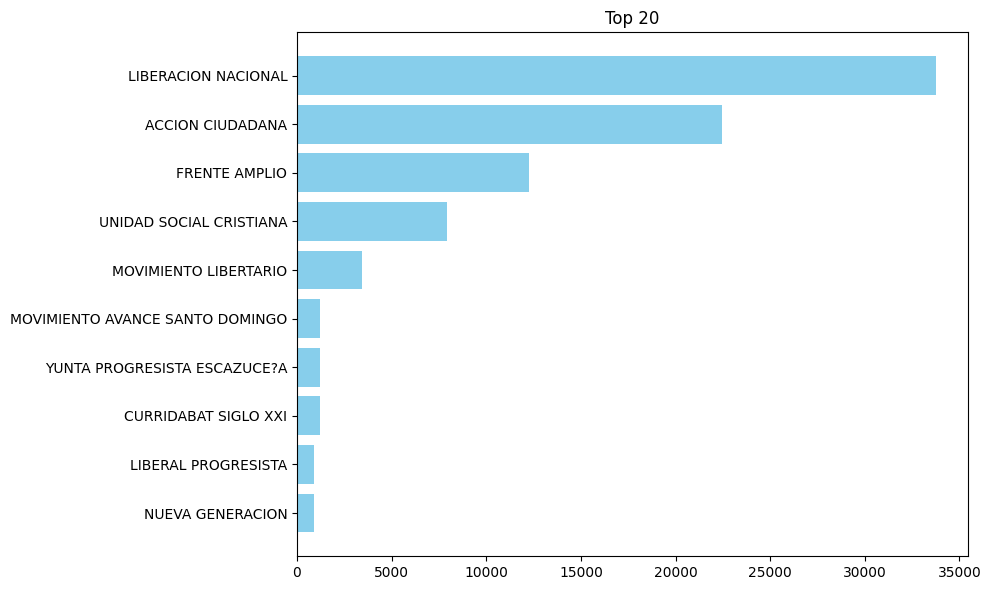

In [9]:
# Filter out parties ending with "(INACTIVO)"
active_aportaciones = aportaciones[~aportaciones['PARTIDO POLÍTICO'].str.endswith('(INACTIVO)', na=False)]

party_contributions_count = active_aportaciones['PARTIDO POLÍTICO'].value_counts()

top_20 = party_contributions_count.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_20.index, top_20.values, color='skyblue')
plt.title('Top 20')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [16]:
def get_period(year):
    if pd.isna(year):
        return None
    # Extract the year from the Timestamp object
    year = year.year
    for partido, periodo in periodos.items():
        if periodo[0] <= year <= periodo[1]:
            return f'{periodo[0]}-{periodo[1]} ({partido})'
    return None

periodos = {'PPSD':[2022, 2026],
            'PAC 2':[2018, 2022],
            'PAC':[2014, 2018],
            'PLN':[2010, 2014],
            'PLN 2':[2006, 2010]}


aportaciones['PERIODO'] = aportaciones['FECHA'].apply(get_period)
display(aportaciones.head())

,TIPO CONTRIBUCIÓN,TIPO PERSONA,PARTIDO POLÍTICO,FECHA,CÉDULA,NOMBRE DEL CONTRIBUYENTE,MONTO,PERIODO
0,EFECTIVO,Nacional,ACCESIBILIDAD SIN EXCLUSION,2010-09-30,102910453,AVILA CHAVARRIA JORGE,5000000.0,2010-2014 (PLN)
1,EFECTIVO,Nacional,ACCESIBILIDAD SIN EXCLUSION,2010-09-30,901050856,MONTOYA CALDERON KRISIA MARIA,10000.0,2010-2014 (PLN)
2,EFECTIVO,Nacional,ACCESIBILIDAD SIN EXCLUSION,2010-10-31,102910453,AVILA CHAVARRIA JORGE,110000.0,2010-2014 (PLN)
3,EFECTIVO,Nacional,ACCESIBILIDAD SIN EXCLUSION,2010-10-31,105990938,FERNANDEZ SOLIS GILBERT PATRICIO,500000.0,2010-2014 (PLN)
4,EFECTIVO,Nacional,ACCESIBILIDAD SIN EXCLUSION,2010-10-31,700900647,VERLEY KNIGHT YELGI LAVINIA,30000.0,2010-2014 (PLN)


/tmp/ipython-input-569267433.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aportaciones_valid_dates['MONTH_YEAR'] = aportaciones_valid_dates['FECHA'].dt.to_period('M')


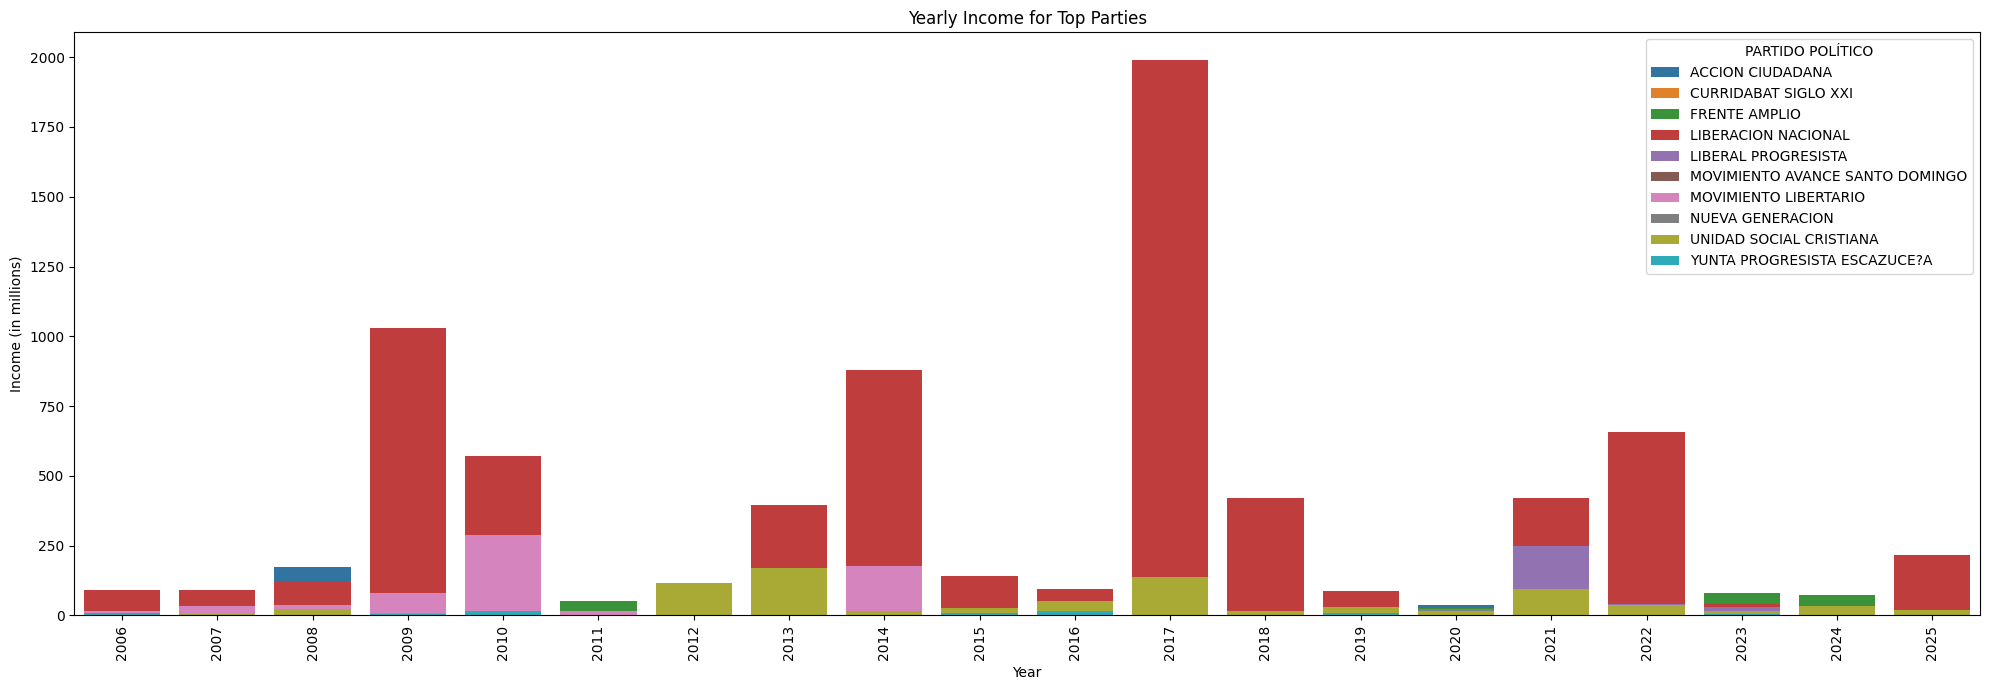

In [18]:
# Select the top parties (you can adjust the number if needed)
aportaciones['FECHA'] = pd.to_datetime(aportaciones['FECHA'], errors='coerce')
aportaciones_valid_dates = aportaciones.dropna(subset=['FECHA'])
aportaciones_valid_dates['MONTH_YEAR'] = aportaciones_valid_dates['FECHA'].dt.to_period('M')
monthly_income = aportaciones_valid_dates.groupby(['PARTIDO POLÍTICO', 'MONTH_YEAR'])['MONTO'].sum().reset_index()
monthly_income['MONTH_YEAR'] = monthly_income['MONTH_YEAR'].dt.to_timestamp()
top_parties_list = top_20.index.tolist()
monthly_income_filtered = monthly_income[monthly_income['PARTIDO POLÍTICO'].isin(top_parties_list)].copy()
monthly_income_filtered['MONTO'] = monthly_income_filtered['MONTO'] / 1_000_000
monthly_income_filtered['YEAR'] = monthly_income_filtered['MONTH_YEAR'].dt.to_period('Y').astype(str)

yearly_income = monthly_income_filtered.groupby(['PARTIDO POLÍTICO', 'YEAR'])['MONTO'].sum().reset_index()

plt.figure(figsize=(20, 7))
sns.barplot(data=yearly_income, x='YEAR', y='MONTO', hue='PARTIDO POLÍTICO', dodge=False) # dodge=False for overlapping bars

plt.title('Yearly Income for Top Parties')
plt.xlabel('Year')
plt.ylabel('Income (in millions)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
import os

folder = "/content/drive/MyDrive/Concurso/Contratos"
try:
    if not os.path.isdir(folder):
        raise FileNotFoundError(f"Folder not found: {folder}")

    all_files = [
        os.path.join(folder, f)
        for f in os.listdir(folder)
        if f.lower().endswith('.xlsx')
    ]

    dataframes = []
    for file in all_files:
        try:
            df = pd.read_excel(file, sheet_name='Informacion de contratos')
            dataframes.append(df)
        except Exception as e:
            print(f"Skipping file {file} due to error: {e}")

    if not dataframes:
        raise ValueError("No valid files could be loaded.")

    contratos = pd.concat(dataframes, ignore_index=True)
    contratos.head()
except Exception as e:
    print(f"Error: {e}")


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default sty

In [ ]:
aportaciones['CÉDULA'].value_counts()

In [ ]:
contratos['Cédula Proveedor'].value_counts()